In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
#from catboost import CatBoostClassifier

In [13]:
data = pd.read_csv(r"C:\Users\manupati manichandan\Desktop\Projet\Heart Prediction Quantum Dataset.csv")

In [ ]:
data.head()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1


In [16]:
data.tail()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
495,34,0,126,292,116,9.303403,0
496,41,0,164,248,114,9.067889,0
497,45,1,159,175,75,8.718708,0
498,55,0,107,157,101,7.337650,1
499,55,0,174,249,89,10.492950,0


In [ ]:
data.isnull().sum()

Age                      0
Gender                   0
BloodPressure            0
Cholesterol              0
HeartRate                0
QuantumPatternFeature    0
HeartDisease             0
dtype: int64

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(500, 7)

<Figure size 1200x600 with 0 Axes>

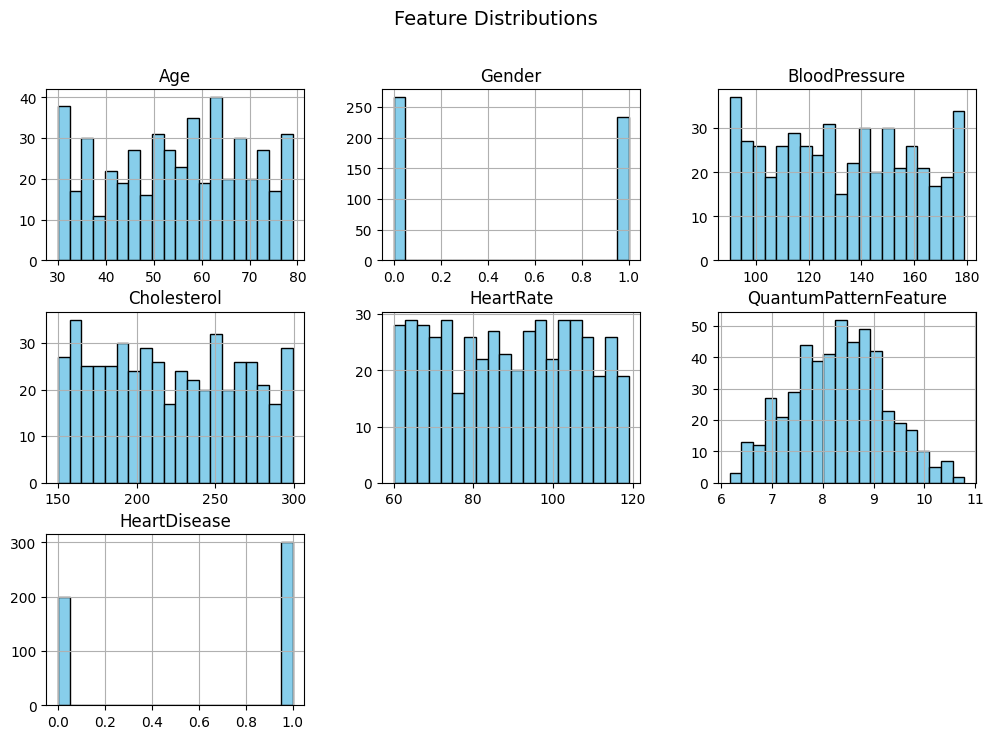

In [ ]:
plt.figure(figsize=(12, 6))
data.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

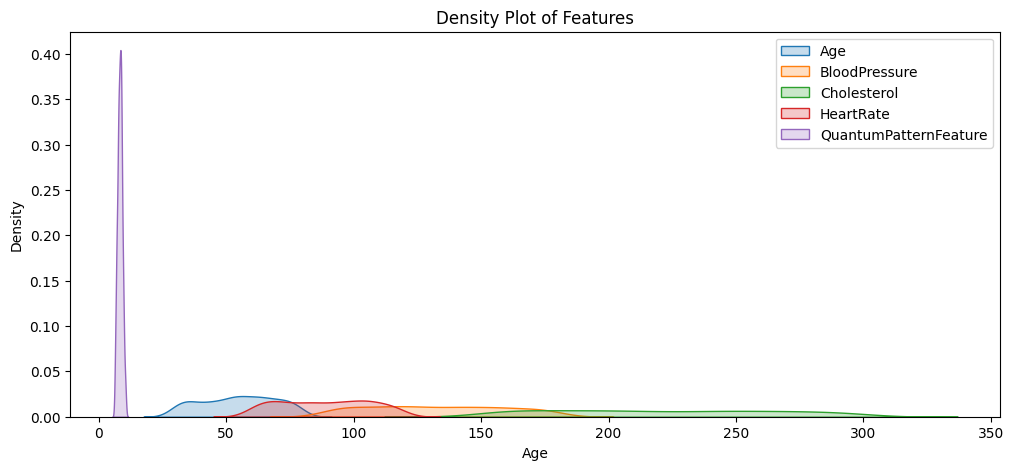

In [ ]:
plt.figure(figsize=(12, 5))
for col in ['Age', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature']:
    sns.kdeplot(data[col], shade=True, label=col)
plt.title("Density Plot of Features")
plt.legend()
plt.show()

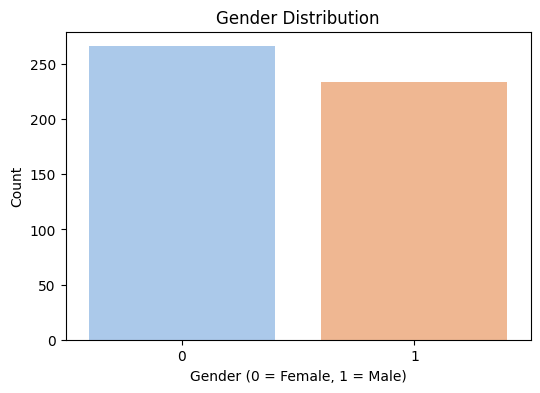

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

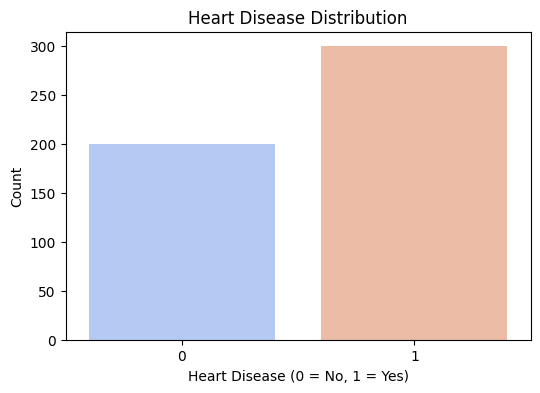

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=data, palette='coolwarm')
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


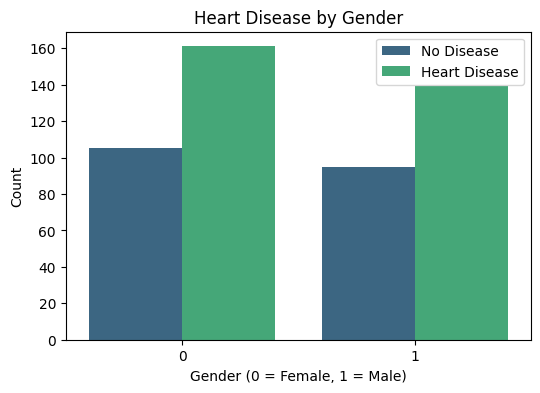

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='HeartDisease', data=data, palette='viridis')
plt.title("Heart Disease by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(["No Disease", "Heart Disease"])
plt.show()

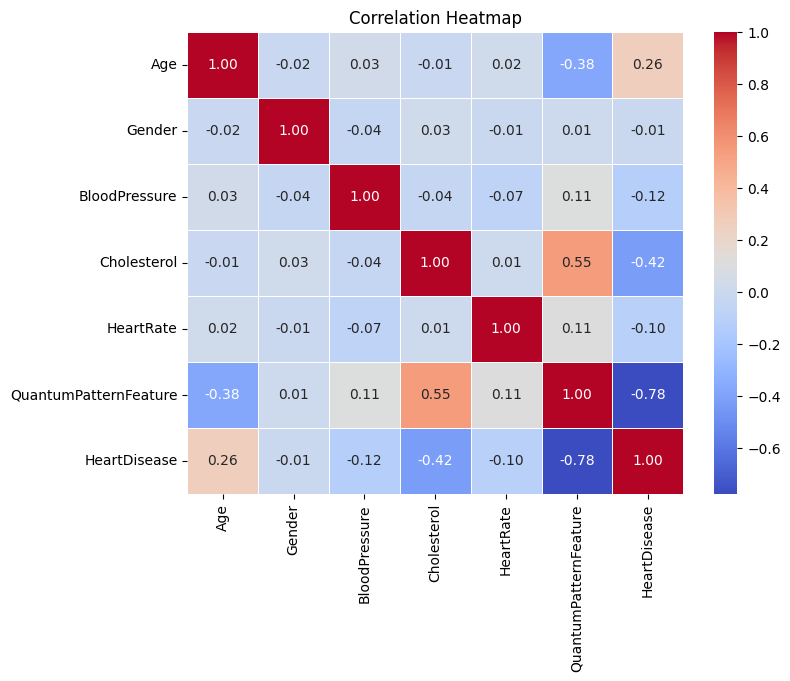

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

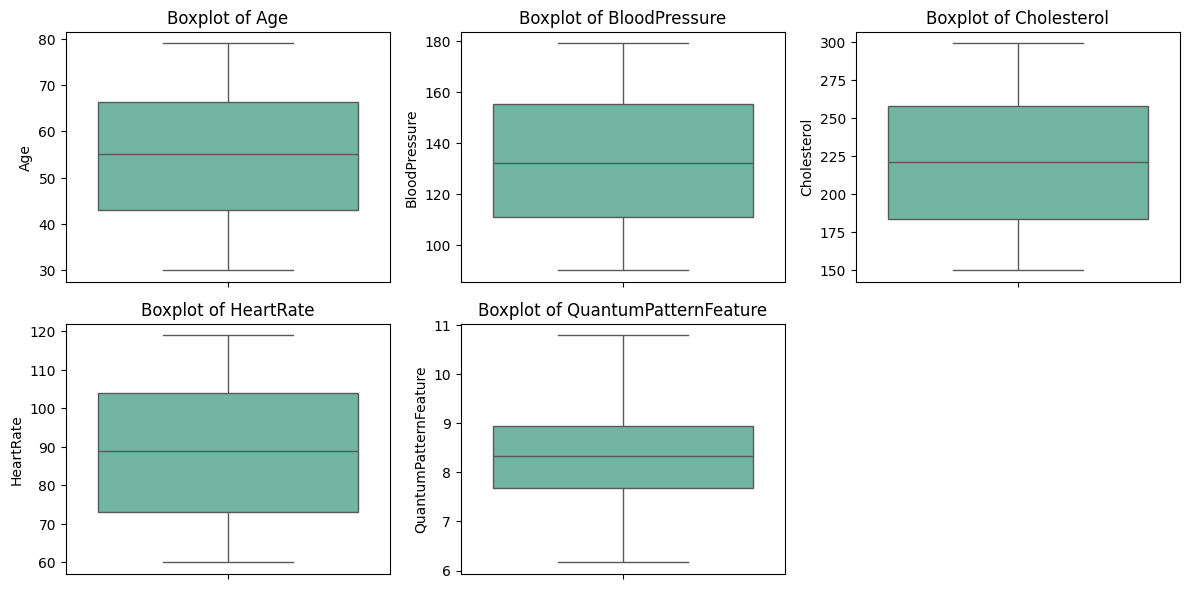

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Age', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data[col], palette='Set2')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

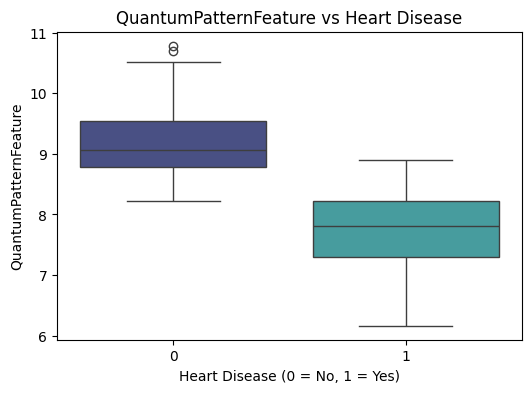

In [30]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='HeartDisease', y='QuantumPatternFeature', data=data, palette='mako')
plt.title("QuantumPatternFeature vs Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("QuantumPatternFeature")
plt.show()

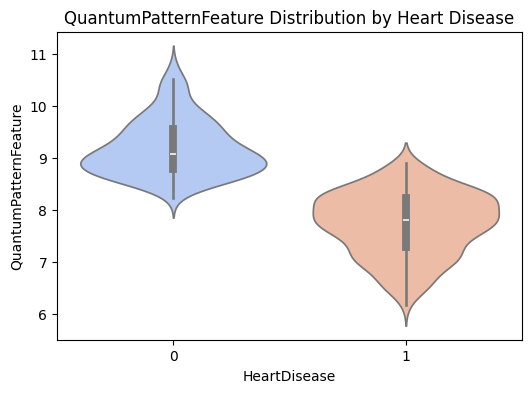

In [31]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='HeartDisease', y='QuantumPatternFeature', data=data, palette='coolwarm')
plt.title("QuantumPatternFeature Distribution by Heart Disease")
plt.show()

In [32]:
X = data.drop(columns=['HeartDisease'])  # Features
y = data['HeartDisease']  # Target variable

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Logistic Regression Model Report:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       1.00      0.92      0.96        60

    accuracy                           0.95       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.96      0.95      0.95       100


K-Nearest Neighbors Model Report:

              precision    recall  f1-score   support

           0       0.88      0.95      0.92        40
           1       0.96      0.92      0.94        60

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Decision Tree Model Report:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.98      0.93      0.96        60

    accuracy                           0.95       100
   macro avg       0.94   

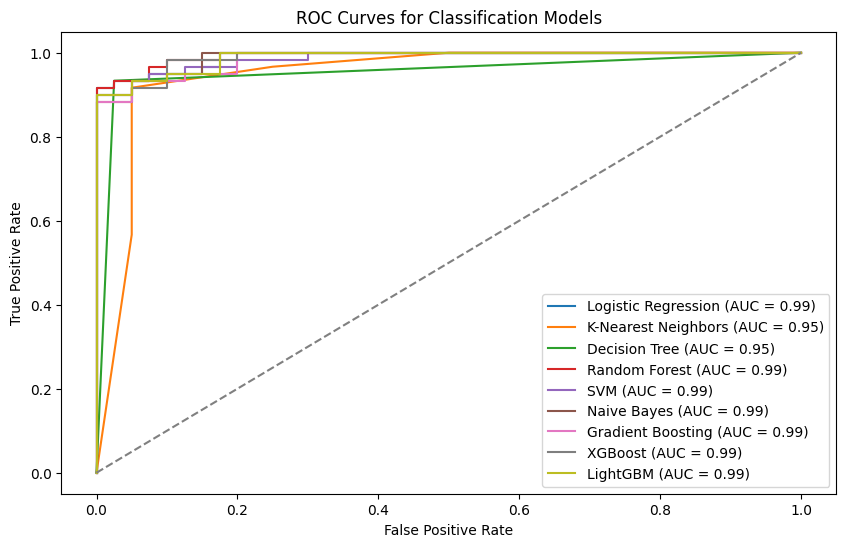

In [35]:
# ====== Step 6: Split Data into Training and Testing Sets ======
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ====== Step 7: Define Classification Models ======
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(),
}

# ====== Step 8: Train Models & Evaluate Performance ======
results = {}
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Print classification report
    print(f"\n{name} Model Report:\n")
    print(classification_report(y_test, y_pred))
    
    # ROC Curve
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probability scores
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

# ====== Step 9: Compare Model Performance ======
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Classification Models")
plt.legend()
plt.show()


🔹 Model Performance Comparison:
Logistic Regression: 0.9500
Decision Tree: 0.9500
Naive Bayes: 0.9400
LightGBM: 0.9400
K-Nearest Neighbors: 0.9300
Random Forest: 0.9300
SVM: 0.9300
XGBoost: 0.9300
Gradient Boosting: 0.9200


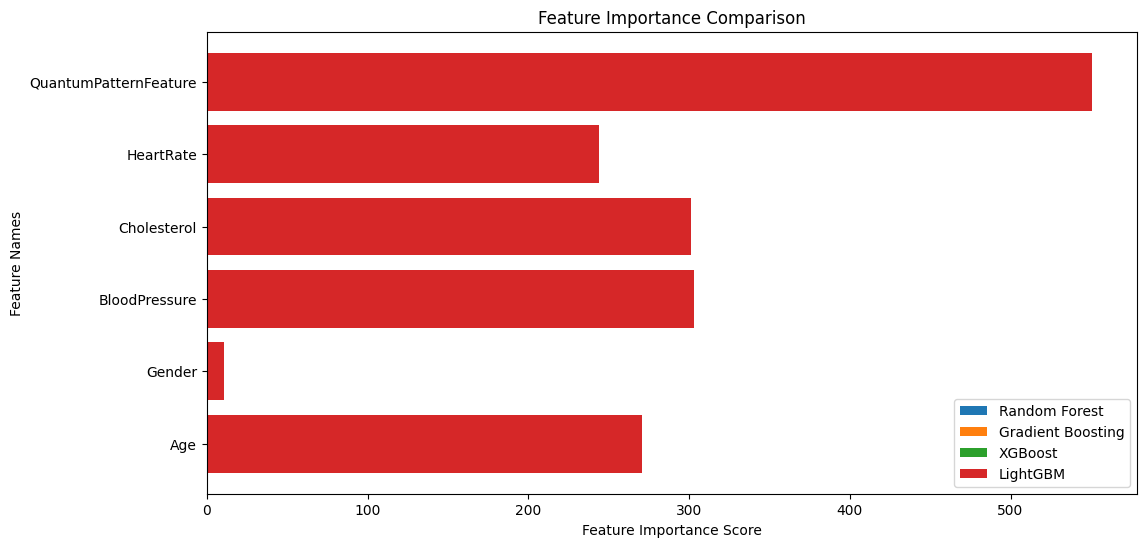

In [36]:
# ====== Step 10: Print Model Comparison ======
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\n🔹 Model Performance Comparison:")
for model, acc in sorted_results:
    print(f"{model}: {acc:.4f}")

# ====== Step 11: Feature Importance for Tree-Based Models ======
tree_models = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost']

plt.figure(figsize=(12, 6))
for name in tree_models:
    if name in models:
        model = models[name]
        importances = model.feature_importances_
        plt.barh(X.columns, importances, label=name)

plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Names")
plt.title("Feature Importance Comparison")
plt.legend()
plt.show()

In [37]:
# ====== Step 12: Hyperparameter Tuning (Random Forest Example) ======
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\n🔍 Best Parameters for Random Forest:", grid_search.best_params_)
print("🔍 Best Score:", grid_search.best_score_)

# ====== Step 13: Select Best Model ======
best_model_name = sorted_results[0][0]
best_model = models[best_model_name]
best_model.fit(X_train, y_train)


🔍 Best Parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
🔍 Best Score: 0.917517674783975


LogisticRegression()